In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (roc_curve, auc, classification_report, 
                             confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import joblib
import os
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('reports/figures', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("EMAIL MARKETING CAMPAIGN ANALYSIS - COMPLETE PIPELINE")
print("="*80)






EMAIL MARKETING CAMPAIGN ANALYSIS - COMPLETE PIPELINE


In [27]:
# Load the dataset

df = pd.read_csv('Email Campaign.csv')

# Display basic information
print(f"✅ Data loaded successfully!")
print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))
print("\nData Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nValue Counts for Success (Target Variable):")
print(df['Success'].value_counts())
print("\nAge Groups:")
print(df['AGE'].value_counts())

✅ Data loaded successfully!
Dataset Shape: (683, 8)

First 10 rows:
   SN  Gender   AGE  Recency_Service  Recency_Product  Bill_Service  \
0   1       1  <=45               12               11         11.82   
1   2       2  <=30                6                0         10.31   
2   3       1  <=30                1                9          7.43   
3   4       1  <=45                2               14         13.68   
4   5       2  <=30                0               11          4.56   
5   6       2  <=30                1                2         18.99   
6   7       1  <=30               11                8         17.53   
7   8       1  <=45               16                9          7.94   
8   9       1  <=45               14                8         41.55   
9  10       1  <=30                8                4          5.75   

   Bill_Product  Success  
0          2.68        0  
1          1.32        0  
2          0.49        0  
3          1.85        0  
4          1.01

## Step 2: Data Processing


📊 STEP 2: Exploratory Data Analysis & Visualizations

✅ EDA visualizations saved: reports/figures/01_exploratory_data_analysis.png


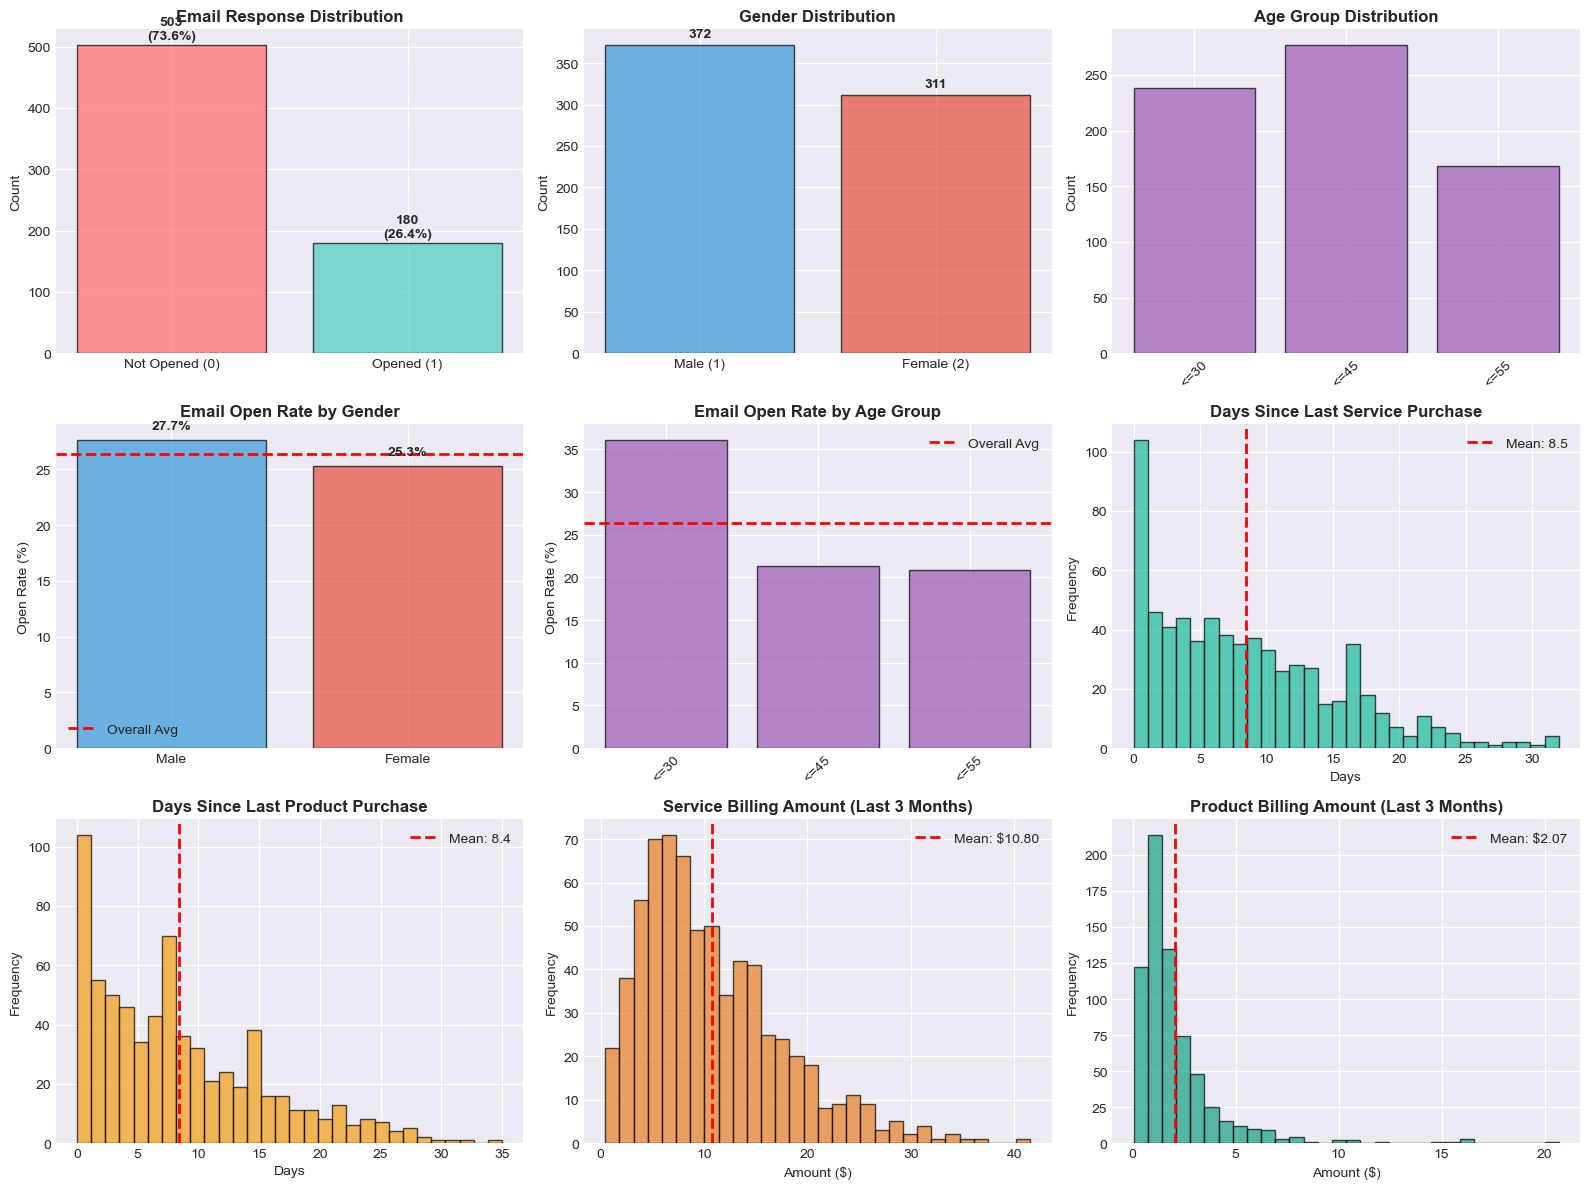


📊 Summary Statistics by Email Response:
--------------------------------------------------------------------------------

Not Opened (Success = 0):
       Recency_Service  Recency_Product  Bill_Service  Bill_Product
count       503.000000       503.000000    503.000000    503.000000
mean          9.606362         9.045726      9.188807      1.746740
std           6.740503         7.120470      5.644067      1.465931
min           0.000000         0.000000      0.450000      0.050000
25%           4.000000         3.000000      5.080000      0.820000
50%           9.000000         8.000000      7.880000      1.310000
75%          14.000000        13.000000     12.305000      2.140000
max          32.000000        35.000000     32.990000     10.690000

Opened (Success = 1):
       Recency_Service  Recency_Product  Bill_Service  Bill_Product
count       180.000000       180.000000    180.000000    180.000000
mean          5.300000         6.505556     15.287111      2.956167
std         

In [28]:
# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS WITH VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("📊 STEP 2: Exploratory Data Analysis & Visualizations")
print("="*80)

# Create a figure with multiple subplots for EDA
fig = plt.figure(figsize=(16, 12))

# 1. Target Variable Distribution
ax1 = plt.subplot(3, 3, 1)
success_counts = df['Success'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
ax1.bar(['Not Opened (0)', 'Opened (1)'], success_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Email Response Distribution', fontweight='bold', fontsize=12)
ax1.set_ylabel('Count')
for i, v in enumerate(success_counts.values):
    ax1.text(i, v + 10, f'{v}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')

# 2. Gender Distribution
ax2 = plt.subplot(3, 3, 2)
gender_counts = df['Gender'].value_counts()
ax2.bar(['Male (1)', 'Female (2)'], gender_counts.values, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
ax2.set_title('Gender Distribution', fontweight='bold', fontsize=12)
ax2.set_ylabel('Count')
for i, v in enumerate(gender_counts.values):
    ax2.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 3. Age Group Distribution
ax3 = plt.subplot(3, 3, 3)
age_counts = df['AGE'].value_counts().sort_index()
ax3.bar(range(len(age_counts)), age_counts.values, color='#9b59b6', alpha=0.7, edgecolor='black')
ax3.set_xticks(range(len(age_counts)))
ax3.set_xticklabels(age_counts.index, rotation=45)
ax3.set_title('Age Group Distribution', fontweight='bold', fontsize=12)
ax3.set_ylabel('Count')

# 4. Success Rate by Gender
ax4 = plt.subplot(3, 3, 4)
success_by_gender = df.groupby('Gender')['Success'].mean() * 100
ax4.bar(['Male', 'Female'], success_by_gender.values, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.set_title('Email Open Rate by Gender', fontweight='bold', fontsize=12)
ax4.set_ylabel('Open Rate (%)')
ax4.axhline(y=df['Success'].mean()*100, color='red', linestyle='--', label='Overall Avg', linewidth=2)
ax4.legend()
for i, v in enumerate(success_by_gender.values):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 5. Success Rate by Age Group
ax5 = plt.subplot(3, 3, 5)
success_by_age = df.groupby('AGE')['Success'].mean() * 100
success_by_age = success_by_age.sort_index()
ax5.bar(range(len(success_by_age)), success_by_age.values, color='#9b59b6', alpha=0.7, edgecolor='black')
ax5.set_xticks(range(len(success_by_age)))
ax5.set_xticklabels(success_by_age.index, rotation=45)
ax5.set_title('Email Open Rate by Age Group', fontweight='bold', fontsize=12)
ax5.set_ylabel('Open Rate (%)')
ax5.axhline(y=df['Success'].mean()*100, color='red', linestyle='--', label='Overall Avg', linewidth=2)
ax5.legend()

# 6. Recency Service Distribution
ax6 = plt.subplot(3, 3, 6)
ax6.hist(df['Recency_Service'], bins=30, color='#1abc9c', alpha=0.7, edgecolor='black')
ax6.set_title('Days Since Last Service Purchase', fontweight='bold', fontsize=12)
ax6.set_xlabel('Days')
ax6.set_ylabel('Frequency')
ax6.axvline(df['Recency_Service'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Recency_Service"].mean():.1f}')
ax6.legend()

# 7. Recency Product Distribution
ax7 = plt.subplot(3, 3, 7)
ax7.hist(df['Recency_Product'], bins=30, color='#f39c12', alpha=0.7, edgecolor='black')
ax7.set_title('Days Since Last Product Purchase', fontweight='bold', fontsize=12)
ax7.set_xlabel('Days')
ax7.set_ylabel('Frequency')
ax7.axvline(df['Recency_Product'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Recency_Product"].mean():.1f}')
ax7.legend()

# 8. Bill Service Distribution
ax8 = plt.subplot(3, 3, 8)
ax8.hist(df['Bill_Service'], bins=30, color='#e67e22', alpha=0.7, edgecolor='black')
ax8.set_title('Service Billing Amount (Last 3 Months)', fontweight='bold', fontsize=12)
ax8.set_xlabel('Amount ($)')
ax8.set_ylabel('Frequency')
ax8.axvline(df['Bill_Service'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Bill_Service"].mean():.2f}')
ax8.legend()

# 9. Bill Product Distribution
ax9 = plt.subplot(3, 3, 9)
ax9.hist(df['Bill_Product'], bins=30, color='#16a085', alpha=0.7, edgecolor='black')
ax9.set_title('Product Billing Amount (Last 3 Months)', fontweight='bold', fontsize=12)
ax9.set_xlabel('Amount ($)')
ax9.set_ylabel('Frequency')
ax9.axvline(df['Bill_Product'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Bill_Product"].mean():.2f}')
ax9.legend()

plt.tight_layout()
plt.savefig('reports/figures/01_exploratory_data_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ EDA visualizations saved: reports/figures/01_exploratory_data_analysis.png")
plt.show()

# Summary Statistics by Success
print("\n📊 Summary Statistics by Email Response:")
print("-" * 80)
print("\nNot Opened (Success = 0):")
print(df[df['Success'] == 0][['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product']].describe())
print("\nOpened (Success = 1):")
print(df[df['Success'] == 1][['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product']].describe())

## STEP 3: Correlation Analysis with Heatmap


📊 STEP 3: Correlation Analysis

📋 Age Encoding Mapping:
   <=30 → 0
   <=45 → 1
   <=55 → 2

✅ Correlation matrix saved: reports/figures/02_correlation_matrix.png


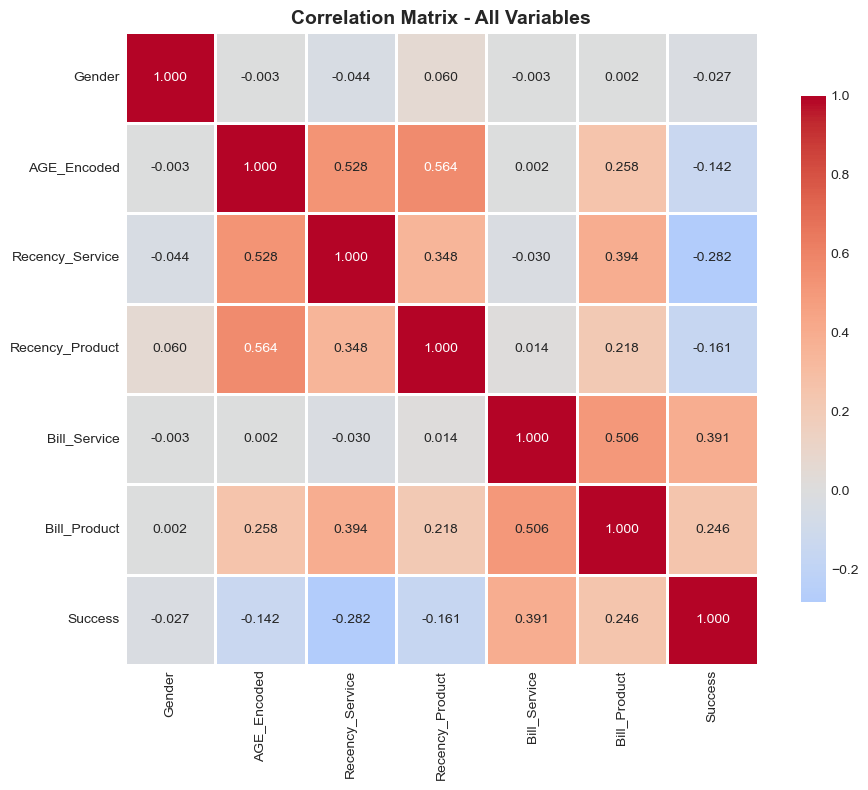


📊 Correlations with Target Variable (Success):
--------------------------------------------------------------------------------
Success            1.000000
Bill_Service       0.391495
Bill_Product       0.246123
Gender            -0.026948
AGE_Encoded       -0.141572
Recency_Product   -0.161083
Recency_Service   -0.282068
Name: Success, dtype: float64


In [29]:
# ============================================================================
# STEP 3: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("📊 STEP 3: Correlation Analysis")
print("="*80)

# Encode AGE variable for correlation analysis
le = LabelEncoder()
df['AGE_Encoded'] = le.fit_transform(df['AGE'])

print("\n📋 Age Encoding Mapping:")
for i, age_group in enumerate(le.classes_):
    print(f"   {age_group} → {i}")

# Create correlation matrix
numeric_cols = ['Gender', 'AGE_Encoded', 'Recency_Service', 'Recency_Product', 
                'Bill_Service', 'Bill_Product', 'Success']
correlation_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix - All Variables', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('reports/figures/02_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("\n✅ Correlation matrix saved: reports/figures/02_correlation_matrix.png")
plt.show()

print("\n📊 Correlations with Target Variable (Success):")
print("-" * 80)
target_corr = correlation_matrix['Success'].sort_values(ascending=False)
print(target_corr)

### STEP 4: Data Preparation with Train/Test Split


📊 STEP 4: Data Preparation & Train/Test Split

✅ Data split completed:
   Total samples: 683
   Training samples: 546 (79.9%)
   Test samples: 137 (20.1%)

   Training set response rate: 26.37%
   Test set response rate: 26.28%

✅ Train/test split visualization saved: reports/figures/03_train_test_split.png


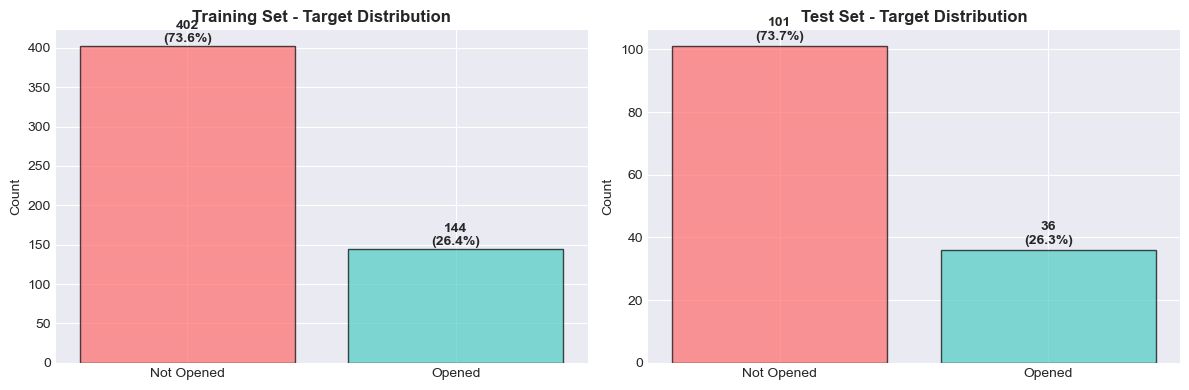

In [30]:
# ============================================================================
# STEP 4: DATA PREPARATION WITH TRAIN/TEST SPLIT
# ============================================================================

print("\n" + "="*80)
print("📊 STEP 4: Data Preparation & Train/Test Split")
print("="*80)

# Prepare features and target
X = df[['Gender', 'AGE_Encoded', 'Recency_Service', 'Recency_Product', 
        'Bill_Service', 'Bill_Product']]
y = df['Success']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Data split completed:")
print(f"   Total samples: {len(X)}")
print(f"   Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n   Training set response rate: {y_train.mean()*100:.2f}%")
print(f"   Test set response rate: {y_test.mean()*100:.2f}%")

# Visualize train/test split
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training set distribution
train_counts = y_train.value_counts()
axes[0].bar(['Not Opened', 'Opened'], train_counts.values, color=['#ff6b6b', '#4ecdc4'], alpha=0.7, edgecolor='black')
axes[0].set_title('Training Set - Target Distribution', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count')
for i, v in enumerate(train_counts.values):
    axes[0].text(i, v + 5, f'{v}\n({v/len(y_train)*100:.1f}%)', ha='center', fontweight='bold')

# Test set distribution
test_counts = y_test.value_counts()
axes[1].bar(['Not Opened', 'Opened'], test_counts.values, color=['#ff6b6b', '#4ecdc4'], alpha=0.7, edgecolor='black')
axes[1].set_title('Test Set - Target Distribution', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Count')
for i, v in enumerate(test_counts.values):
    axes[1].text(i, v + 2, f'{v}\n({v/len(y_test)*100:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('reports/figures/03_train_test_split.png', dpi=300, bbox_inches='tight')
print("\n✅ Train/test split visualization saved: reports/figures/03_train_test_split.png")
plt.show()

### STEP 5: Question 1 - Logistic Regression with Significance Testing


📈 QUESTION 1: Binary Logistic Regression with Statistical Testing
Optimization terminated successfully.
         Current function value: 0.384373
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  546
Model:                          Logit   Df Residuals:                      539
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Oct 2025   Pseudo R-squ.:                  0.3338
Time:                        12:50:38   Log-Likelihood:                -209.87
converged:                       True   LL-Null:                       -315.00
Covariance Type:            nonrobust   LLR p-value:                 1.233e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1513    

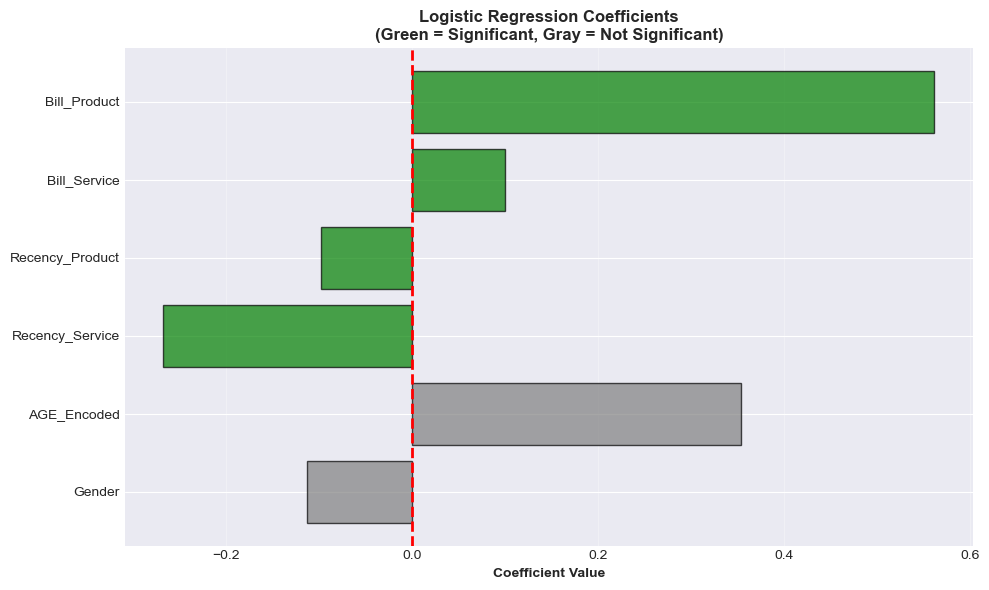


💡 INTERPRETATION OF SIGNIFICANT VARIABLES:
--------------------------------------------------------------------------------

• Recency_Service: NEGATIVE ↓
  Coefficient: -0.2671 (p-value: 0.0000)
  → Decreases the likelihood of email being opened

• Recency_Product: NEGATIVE ↓
  Coefficient: -0.0980 (p-value: 0.0001)
  → Decreases the likelihood of email being opened

• Bill_Service: POSITIVE ↑
  Coefficient: 0.1003 (p-value: 0.0000)
  → Increases the likelihood of email being opened

• Bill_Product: POSITIVE ↑
  Coefficient: 0.5617 (p-value: 0.0000)
  → Increases the likelihood of email being opened

MODEL PERFORMANCE - LOGISTIC REGRESSION (Significant Variables)

📊 TRAINING SET PERFORMANCE:
              precision    recall  f1-score   support

  Not Opened       0.86      0.93      0.89       402
      Opened       0.74      0.56      0.64       144

    accuracy                           0.83       546
   macro avg       0.80      0.75      0.77       546
weighted avg       0.83  

In [31]:
# ============================================================================
# QUESTION 1: BINARY LOGISTIC REGRESSION WITH SIGNIFICANCE TESTING
# ============================================================================

print("\n" + "="*80)
print("📈 QUESTION 1: Binary Logistic Regression with Statistical Testing")
print("="*80)

# Use statsmodels for detailed statistical analysis
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print("\n" + result.summary().as_text())

# Extract coefficients and significance
coef_df = pd.DataFrame({
    'Variable': X_train_const.columns,
    'Coefficient': result.params,
    'Std Error': result.bse,
    'P-value': result.pvalues,
    'Significant': result.pvalues < 0.05
})

print("\n" + "="*80)
print("COEFFICIENT INTERPRETATION")
print("="*80)
print(coef_df.to_string(index=False))

# Identify significant variables
significant_vars_list = coef_df[coef_df['Significant'] == True]['Variable'].tolist()
if 'const' in significant_vars_list:
    significant_vars_list.remove('const')

print(f"\n✅ Significant Variables (p < 0.05): {significant_vars_list}")

# Visualize coefficients
plt.figure(figsize=(10, 6))
coef_plot = coef_df[coef_df['Variable'] != 'const'].copy()
colors = ['green' if sig else 'gray' for sig in coef_plot['Significant']]
bars = plt.barh(coef_plot['Variable'], coef_plot['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Coefficient Value', fontweight='bold')
plt.title('Logistic Regression Coefficients\n(Green = Significant, Gray = Not Significant)', 
          fontweight='bold', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('reports/figures/04_logistic_regression_coefficients.png', dpi=300, bbox_inches='tight')
print("\n✅ Coefficient plot saved: reports/figures/04_logistic_regression_coefficients.png")
plt.show()

print("\n💡 INTERPRETATION OF SIGNIFICANT VARIABLES:")
print("-" * 80)
for idx, row in coef_df[coef_df['Significant'] == True].iterrows():
    if row['Variable'] != 'const':
        sign = "POSITIVE ↑" if row['Coefficient'] > 0 else "NEGATIVE ↓"
        print(f"\n• {row['Variable']}: {sign}")
        print(f"  Coefficient: {row['Coefficient']:.4f} (p-value: {row['P-value']:.4f})")
        if row['Coefficient'] > 0:
            print(f"  → Increases the likelihood of email being opened")
        else:
            print(f"  → Decreases the likelihood of email being opened")

# Train sklearn Logistic Regression with significant variables for predictions
if len(significant_vars_list) > 0:
    X_train_sig = X_train[significant_vars_list]
    X_test_sig = X_test[significant_vars_list]
else:
    # If no significant variables, use all
    X_train_sig = X_train
    X_test_sig = X_test
    significant_vars_list = list(X_train.columns)

log_reg_sig = LogisticRegression(max_iter=1000, random_state=42)
log_reg_sig.fit(X_train_sig, y_train)

# Predictions
y_train_pred_lr = log_reg_sig.predict(X_train_sig)
y_test_pred_lr = log_reg_sig.predict(X_test_sig)
y_train_prob_lr = log_reg_sig.predict_proba(X_train_sig)[:, 1]
y_test_prob_lr = log_reg_sig.predict_proba(X_test_sig)[:, 1]

# Calculate metrics
print("\n" + "="*80)
print("MODEL PERFORMANCE - LOGISTIC REGRESSION (Significant Variables)")
print("="*80)
print("\n📊 TRAINING SET PERFORMANCE:")
print(classification_report(y_train, y_train_pred_lr, target_names=['Not Opened', 'Opened']))

print("\n📊 TEST SET PERFORMANCE:")
print(classification_report(y_test, y_test_pred_lr, target_names=['Not Opened', 'Opened']))

# Save model
joblib.dump(log_reg_sig, 'models/logistic_regression_significant.pkl')
joblib.dump(significant_vars_list, 'models/significant_variables.pkl')
joblib.dump(le, 'models/age_label_encoder.pkl')
print("\n✅ Model saved: models/logistic_regression_significant.pkl")

### STEP 6: Question 2 - Naive Bayes Model

In [32]:
# ============================================================================
# QUESTION 2: NAIVE BAYES MODEL
# ============================================================================

print("\n" + "="*80)
print("📈 QUESTION 2: Naive Bayes Classification")
print("="*80)

# Train Naive Bayes with all variables
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)
y_train_prob_nb = nb.predict_proba(X_train)[:, 1]
y_test_prob_nb = nb.predict_proba(X_test)[:, 1]

# Performance metrics
print("\n📊 TRAINING SET PERFORMANCE:")
print(classification_report(y_train, y_train_pred_nb, target_names=['Not Opened', 'Opened']))

print("\n📊 TEST SET PERFORMANCE:")
print(classification_report(y_test, y_test_pred_nb, target_names=['Not Opened', 'Opened']))

# Save model
joblib.dump(nb, 'models/naive_bayes_model.pkl')
print("\n✅ Model saved: models/naive_bayes_model.pkl")


📈 QUESTION 2: Naive Bayes Classification

📊 TRAINING SET PERFORMANCE:
              precision    recall  f1-score   support

  Not Opened       0.80      0.92      0.86       402
      Opened       0.63      0.36      0.46       144

    accuracy                           0.77       546
   macro avg       0.71      0.64      0.66       546
weighted avg       0.76      0.77      0.75       546


📊 TEST SET PERFORMANCE:
              precision    recall  f1-score   support

  Not Opened       0.78      0.92      0.85       101
      Opened       0.56      0.28      0.37        36

    accuracy                           0.75       137
   macro avg       0.67      0.60      0.61       137
weighted avg       0.72      0.75      0.72       137


✅ Model saved: models/naive_bayes_model.pkl


### STEP 7: Question 3 - SVM with Feature Engineering

In [33]:
# ============================================================================
# QUESTION 3: SVM WITH FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*80)
print("📈 QUESTION 3: Support Vector Machine with Combined Features")
print("="*80)

# Create combined features
print("\n📊 Creating Combined Features...")
df['Total_Recency'] = df['Recency_Service'] + df['Recency_Product']
df['Total_Bill'] = df['Bill_Service'] + df['Bill_Product']
df['Recency_Ratio'] = df['Recency_Service'] / (df['Recency_Product'] + 1)
df['Bill_Ratio'] = df['Bill_Service'] / (df['Bill_Product'] + 1)

print("   ✅ Total_Recency = Recency_Service + Recency_Product")
print("   ✅ Total_Bill = Bill_Service + Bill_Product")
print("   ✅ Recency_Ratio = Recency_Service / (Recency_Product + 1)")
print("   ✅ Bill_Ratio = Bill_Service / (Bill_Product + 1)")

# Prepare combined features dataset
X_combined = df[['Gender', 'AGE_Encoded', 'Total_Recency', 'Total_Bill', 
                 'Recency_Ratio', 'Bill_Ratio']]

# Re-split with combined features
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression with combined features
print("\n🔄 Training Logistic Regression (Combined Features)...")
log_reg_combined = LogisticRegression(max_iter=1000, random_state=42)
log_reg_combined.fit(X_train_comb, y_train_comb)

y_train_pred_lr_comb = log_reg_combined.predict(X_train_comb)
y_test_pred_lr_comb = log_reg_combined.predict(X_test_comb)
y_train_prob_lr_comb = log_reg_combined.predict_proba(X_train_comb)[:, 1]
y_test_prob_lr_comb = log_reg_combined.predict_proba(X_test_comb)[:, 1]

print("\n📊 Logistic Regression (Combined) - TEST SET PERFORMANCE:")
print(classification_report(y_test_comb, y_test_pred_lr_comb, target_names=['Not Opened', 'Opened']))

# Train SVM with combined features
print("\n🔄 Training Support Vector Machine (RBF Kernel)...")
svm_model = SVC(kernel='rbf', probability=True, random_state=42, gamma='scale')
svm_model.fit(X_train_comb, y_train_comb)

y_train_pred_svm = svm_model.predict(X_train_comb)
y_test_pred_svm = svm_model.predict(X_test_comb)
y_train_prob_svm = svm_model.predict_proba(X_train_comb)[:, 1]
y_test_prob_svm = svm_model.predict_proba(X_test_comb)[:, 1]

print("\n📊 SVM - TEST SET PERFORMANCE:")
print(classification_report(y_test_comb, y_test_pred_svm, target_names=['Not Opened', 'Opened']))

# Save models
joblib.dump(log_reg_combined, 'models/logistic_regression_combined.pkl')
joblib.dump(svm_model, 'models/svm_model.pkl')
df.to_csv('data/processed/email_campaign_processed.csv', index=False)
print("\n✅ Models saved:")
print("   - models/logistic_regression_combined.pkl")
print("   - models/svm_model.pkl")
print("   - data/processed/email_campaign_processed.csv")


📈 QUESTION 3: Support Vector Machine with Combined Features

📊 Creating Combined Features...
   ✅ Total_Recency = Recency_Service + Recency_Product
   ✅ Total_Bill = Bill_Service + Bill_Product
   ✅ Recency_Ratio = Recency_Service / (Recency_Product + 1)
   ✅ Bill_Ratio = Bill_Service / (Bill_Product + 1)

🔄 Training Logistic Regression (Combined Features)...

📊 Logistic Regression (Combined) - TEST SET PERFORMANCE:
              precision    recall  f1-score   support

  Not Opened       0.79      0.94      0.86       101
      Opened       0.65      0.31      0.42        36

    accuracy                           0.77       137
   macro avg       0.72      0.62      0.64       137
weighted avg       0.75      0.77      0.74       137


🔄 Training Support Vector Machine (RBF Kernel)...

📊 SVM - TEST SET PERFORMANCE:
              precision    recall  f1-score   support

  Not Opened       0.79      0.95      0.86       101
      Opened       0.67      0.28      0.39        36

    ac

### STEP 8: Comprehensive Model Comparison with ROC Curves


📊 COMPREHENSIVE MODEL COMPARISON

✅ Comprehensive comparison saved: reports/figures/05_comprehensive_model_comparison.png


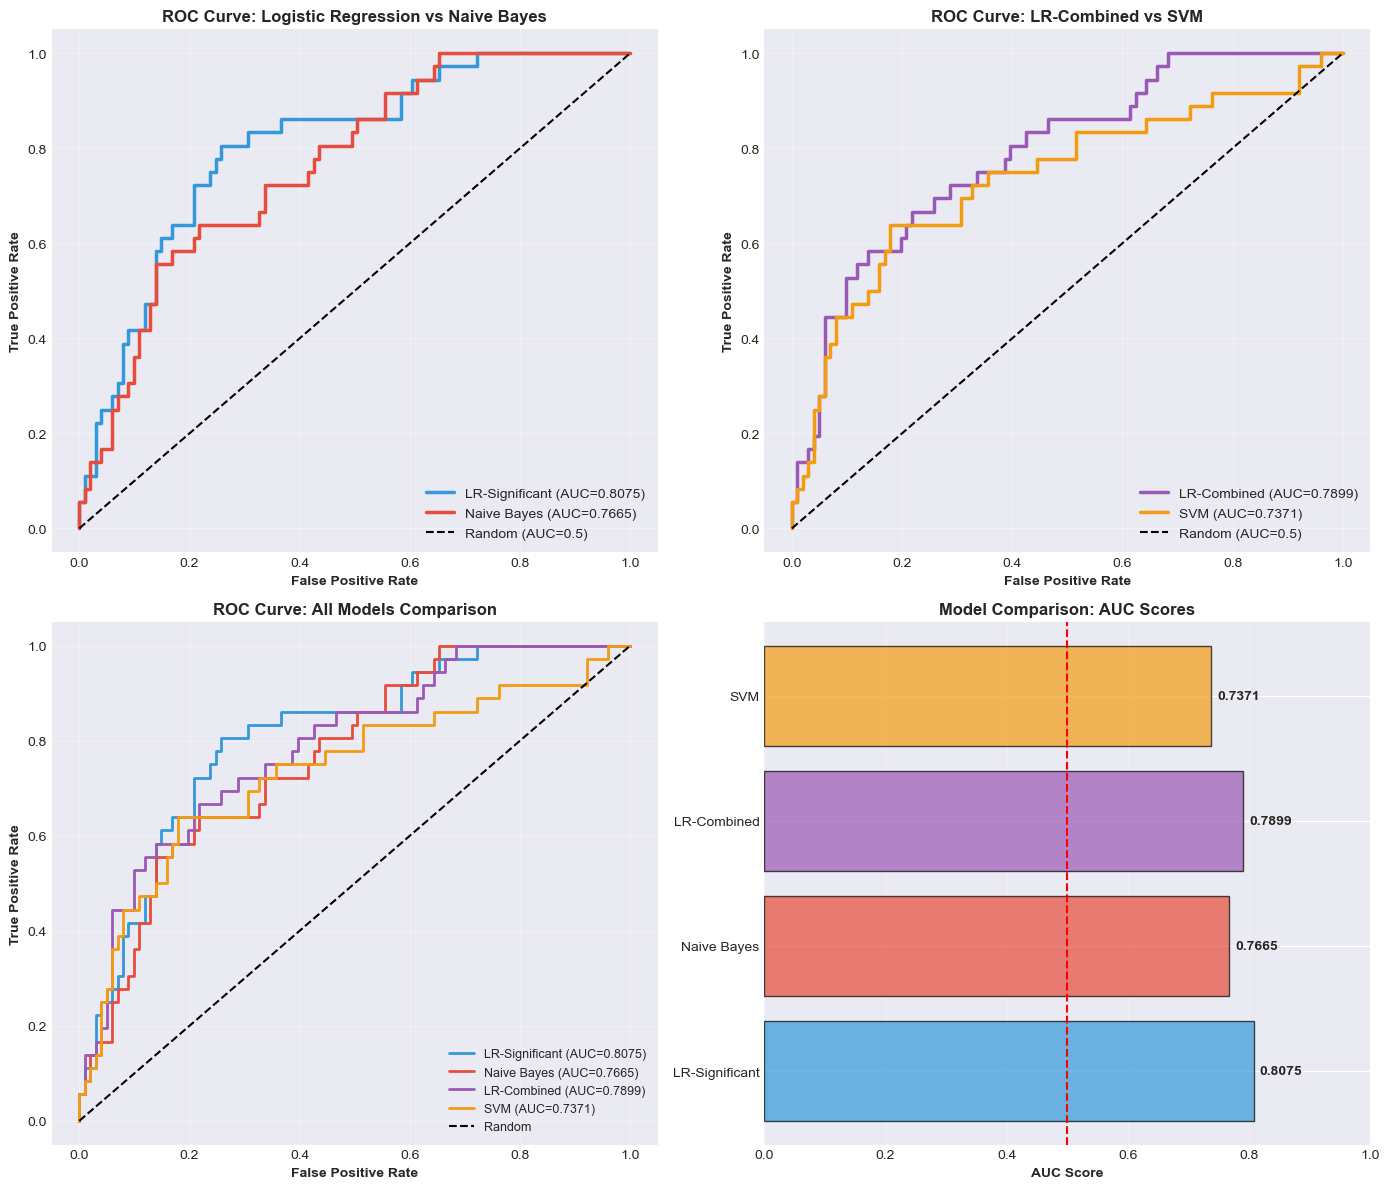


MODEL PERFORMANCE SUMMARY TABLE

                            Model  Features      AUC  Accuracy  Precision   Recall  F1-Score  Rank
Logistic Regression (Significant)         4 0.807481  0.759124   0.588235 0.277778  0.377358     1
   Logistic Regression (Combined)         6 0.789879  0.773723   0.647059 0.305556  0.415094     2
      Naive Bayes (All Variables)         6 0.766502  0.751825   0.555556 0.277778  0.370370     3
                 SVM (RBF Kernel)         6 0.737074  0.773723   0.666667 0.277778  0.392157     4

🏆 BEST PERFORMING MODEL
   Model: Logistic Regression (Significant)
   AUC Score: 0.8075
   Accuracy: 0.7591
   Precision: 0.5882
   Recall: 0.2778
   F1-Score: 0.3774

✅ Summary table saved: reports/model_performance_summary.csv


In [34]:
# ============================================================================
# COMPREHENSIVE MODEL COMPARISON
# ============================================================================

print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# Calculate ROC curves and AUC scores for all models
# Model 1: Logistic Regression (Significant)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Model 2: Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Model 3: Logistic Regression (Combined)
fpr_lr_comb, tpr_lr_comb, _ = roc_curve(y_test_comb, y_test_prob_lr_comb)
auc_lr_comb = auc(fpr_lr_comb, tpr_lr_comb)

# Model 4: SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_comb, y_test_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# Create comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ROC Curve 1: LR vs NB
axes[0, 0].plot(fpr_lr, tpr_lr, label=f'LR-Significant (AUC={auc_lr:.4f})', linewidth=2.5, color='#3498db')
axes[0, 0].plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC={auc_nb:.4f})', linewidth=2.5, color='#e74c3c')
axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random (AUC=0.5)')
axes[0, 0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0, 0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0, 0].set_title('ROC Curve: Logistic Regression vs Naive Bayes', fontweight='bold', fontsize=12)
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(alpha=0.3)

# ROC Curve 2: LR-Combined vs SVM
axes[0, 1].plot(fpr_lr_comb, tpr_lr_comb, label=f'LR-Combined (AUC={auc_lr_comb:.4f})', linewidth=2.5, color='#9b59b6')
axes[0, 1].plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.4f})', linewidth=2.5, color='#f39c12')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random (AUC=0.5)')
axes[0, 1].set_xlabel('False Positive Rate', fontweight='bold')
axes[0, 1].set_ylabel('True Positive Rate', fontweight='bold')
axes[0, 1].set_title('ROC Curve: LR-Combined vs SVM', fontweight='bold', fontsize=12)
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(alpha=0.3)

# ROC Curve 3: All Models Together
axes[1, 0].plot(fpr_lr, tpr_lr, label=f'LR-Significant (AUC={auc_lr:.4f})', linewidth=2, color='#3498db')
axes[1, 0].plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC={auc_nb:.4f})', linewidth=2, color='#e74c3c')
axes[1, 0].plot(fpr_lr_comb, tpr_lr_comb, label=f'LR-Combined (AUC={auc_lr_comb:.4f})', linewidth=2, color='#9b59b6')
axes[1, 0].plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.4f})', linewidth=2, color='#f39c12')
axes[1, 0].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
axes[1, 0].set_xlabel('False Positive Rate', fontweight='bold')
axes[1, 0].set_ylabel('True Positive Rate', fontweight='bold')
axes[1, 0].set_title('ROC Curve: All Models Comparison', fontweight='bold', fontsize=12)
axes[1, 0].legend(loc='lower right', fontsize=9)
axes[1, 0].grid(alpha=0.3)

# AUC Comparison Bar Chart
axes[1, 1].barh(['LR-Significant', 'Naive Bayes', 'LR-Combined', 'SVM'], 
                [auc_lr, auc_nb, auc_lr_comb, auc_svm],
                color=['#3498db', '#e74c3c', '#9b59b6', '#f39c12'],
                alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('AUC Score', fontweight='bold')
axes[1, 1].set_title('Model Comparison: AUC Scores', fontweight='bold', fontsize=12)
axes[1, 1].set_xlim([0, 1])
axes[1, 1].axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, label='Baseline')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate([auc_lr, auc_nb, auc_lr_comb, auc_svm]):
    axes[1, 1].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('reports/figures/05_comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Comprehensive comparison saved: reports/figures/05_comprehensive_model_comparison.png")
plt.show()

# Print summary table
print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY TABLE")
print("="*80)

# Calculate additional metrics for all models
models_summary = []

# LR - Significant
models_summary.append({
    'Model': 'Logistic Regression (Significant)',
    'Features': len(significant_vars_list),
    'AUC': auc_lr,
    'Accuracy': accuracy_score(y_test, y_test_pred_lr),
    'Precision': precision_score(y_test, y_test_pred_lr),
    'Recall': recall_score(y_test, y_test_pred_lr),
    'F1-Score': f1_score(y_test, y_test_pred_lr)
})

# Naive Bayes
models_summary.append({
    'Model': 'Naive Bayes (All Variables)',
    'Features': len(X_train.columns),
    'AUC': auc_nb,
    'Accuracy': accuracy_score(y_test, y_test_pred_nb),
    'Precision': precision_score(y_test, y_test_pred_nb),
    'Recall': recall_score(y_test, y_test_pred_nb),
    'F1-Score': f1_score(y_test, y_test_pred_nb)
})

# LR - Combined
models_summary.append({
    'Model': 'Logistic Regression (Combined)',
    'Features': len(X_train_comb.columns),
    'AUC': auc_lr_comb,
    'Accuracy': accuracy_score(y_test_comb, y_test_pred_lr_comb),
    'Precision': precision_score(y_test_comb, y_test_pred_lr_comb),
    'Recall': recall_score(y_test_comb, y_test_pred_lr_comb),
    'F1-Score': f1_score(y_test_comb, y_test_pred_lr_comb)
})

# SVM
models_summary.append({
    'Model': 'SVM (RBF Kernel)',
    'Features': len(X_train_comb.columns),
    'AUC': auc_svm,
    'Accuracy': accuracy_score(y_test_comb, y_test_pred_svm),
    'Precision': precision_score(y_test_comb, y_test_pred_svm),
    'Recall': recall_score(y_test_comb, y_test_pred_svm),
    'F1-Score': f1_score(y_test_comb, y_test_pred_svm)
})

summary_df = pd.DataFrame(models_summary)
summary_df = summary_df.sort_values('AUC', ascending=False).reset_index(drop=True)
summary_df['Rank'] = range(1, len(summary_df) + 1)

print("\n" + summary_df.to_string(index=False))

# Determine best model
best_model = summary_df.iloc[0]
print("\n" + "="*80)
print("🏆 BEST PERFORMING MODEL")
print("="*80)
print(f"   Model: {best_model['Model']}")
print(f"   AUC Score: {best_model['AUC']:.4f}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall: {best_model['Recall']:.4f}")
print(f"   F1-Score: {best_model['F1-Score']:.4f}")

# Save summary table
summary_df.to_csv('reports/model_performance_summary.csv', index=False)
print("\n✅ Summary table saved: reports/model_performance_summary.csv")

### STEP 9: Confusion Matrices Visualization


📊 CONFUSION MATRICES

✅ Confusion matrices saved: reports/figures/06_confusion_matrices.png


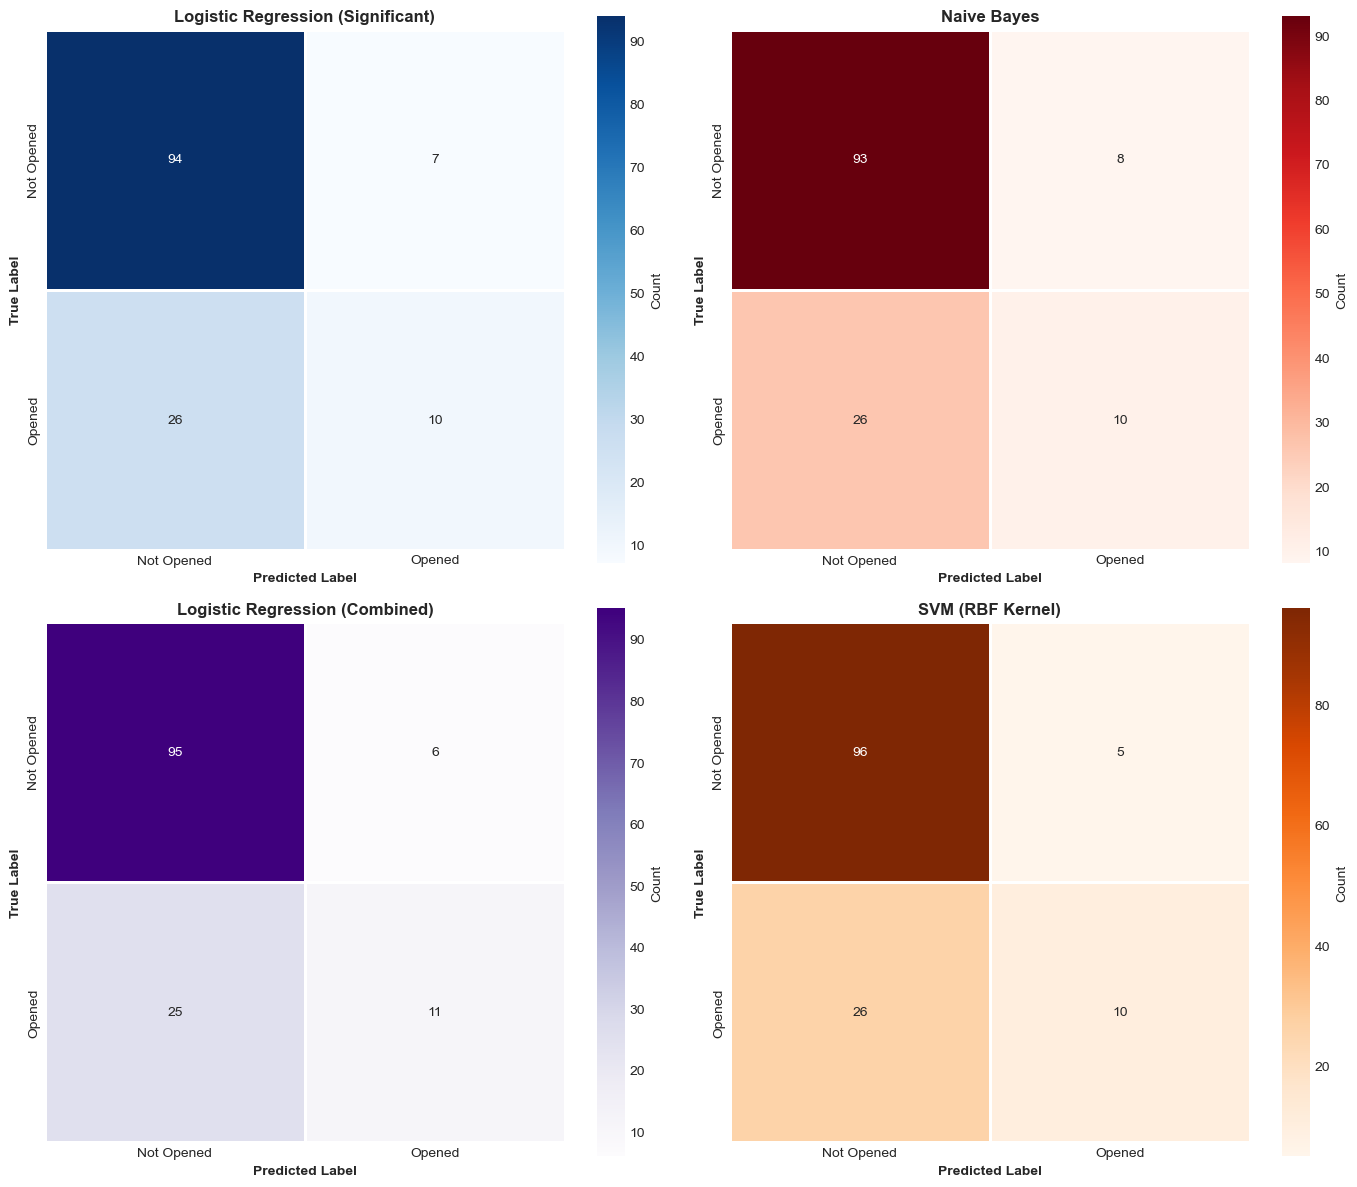

In [35]:
# ============================================================================
# CONFUSION MATRICES FOR ALL MODELS
# ============================================================================

print("\n" + "="*80)
print("📊 CONFUSION MATRICES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Confusion Matrix 1: LR - Significant
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], 
            cbar_kws={'label': 'Count'}, square=True, linewidths=1)
axes[0, 0].set_title('Logistic Regression (Significant)', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('True Label', fontweight='bold')
axes[0, 0].set_xlabel('Predicted Label', fontweight='bold')
axes[0, 0].set_xticklabels(['Not Opened', 'Opened'])
axes[0, 0].set_yticklabels(['Not Opened', 'Opened'])

# Confusion Matrix 2: Naive Bayes
cm_nb = confusion_matrix(y_test, y_test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds', ax=axes[0, 1], 
            cbar_kws={'label': 'Count'}, square=True, linewidths=1)
axes[0, 1].set_title('Naive Bayes', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('True Label', fontweight='bold')
axes[0, 1].set_xlabel('Predicted Label', fontweight='bold')
axes[0, 1].set_xticklabels(['Not Opened', 'Opened'])
axes[0, 1].set_yticklabels(['Not Opened', 'Opened'])

# Confusion Matrix 3: LR - Combined
cm_lr_comb = confusion_matrix(y_test_comb, y_test_pred_lr_comb)
sns.heatmap(cm_lr_comb, annot=True, fmt='d', cmap='Purples', ax=axes[1, 0], 
            cbar_kws={'label': 'Count'}, square=True, linewidths=1)
axes[1, 0].set_title('Logistic Regression (Combined)', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('True Label', fontweight='bold')
axes[1, 0].set_xlabel('Predicted Label', fontweight='bold')
axes[1, 0].set_xticklabels(['Not Opened', 'Opened'])
axes[1, 0].set_yticklabels(['Not Opened', 'Opened'])

# Confusion Matrix 4: SVM
cm_svm = confusion_matrix(y_test_comb, y_test_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1], 
            cbar_kws={'label': 'Count'}, square=True, linewidths=1)
axes[1, 1].set_title('SVM (RBF Kernel)', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('True Label', fontweight='bold')
axes[1, 1].set_xlabel('Predicted Label', fontweight='bold')
axes[1, 1].set_xticklabels(['Not Opened', 'Opened'])
axes[1, 1].set_yticklabels(['Not Opened', 'Opened'])

plt.tight_layout()
plt.savefig('reports/figures/06_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("\n✅ Confusion matrices saved: reports/figures/06_confusion_matrices.png")
plt.show()

### STEP 10: Save Model Metadata and Complete Pipeline

In [36]:
# ============================================================================
# SAVE MODEL METADATA AND FINALIZE
# ============================================================================

print("\n" + "="*80)
print("💾 SAVING MODEL METADATA")
print("="*80)

# Create comprehensive metadata
model_metadata = {
    'project': 'Email Marketing Campaign Success Prediction',
    'date_trained': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset': {
        'total_samples': len(df),
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'response_rate': float(df['Success'].mean()),
        'train_response_rate': float(y_train.mean()),
        'test_response_rate': float(y_test.mean())
    },
    'models': {
        'logistic_regression_significant': {
            'features': significant_vars_list,
            'n_features': len(significant_vars_list),
            'auc': float(auc_lr),
            'accuracy': float(accuracy_score(y_test, y_test_pred_lr)),
            'precision': float(precision_score(y_test, y_test_pred_lr)),
            'recall': float(recall_score(y_test, y_test_pred_lr)),
            'f1_score': float(f1_score(y_test, y_test_pred_lr)),
            'file': 'models/logistic_regression_significant.pkl'
        },
        'naive_bayes': {
            'features': list(X_train.columns),
            'n_features': len(X_train.columns),
            'auc': float(auc_nb),
            'accuracy': float(accuracy_score(y_test, y_test_pred_nb)),
            'precision': float(precision_score(y_test, y_test_pred_nb)),
            'recall': float(recall_score(y_test, y_test_pred_nb)),
            'f1_score': float(f1_score(y_test, y_test_pred_nb)),
            'file': 'models/naive_bayes_model.pkl'
        },
        'logistic_regression_combined': {
            'features': list(X_train_comb.columns),
            'n_features': len(X_train_comb.columns),
            'auc': float(auc_lr_comb),
            'accuracy': float(accuracy_score(y_test_comb, y_test_pred_lr_comb)),
            'precision': float(precision_score(y_test_comb, y_test_pred_lr_comb)),
            'recall': float(recall_score(y_test_comb, y_test_pred_lr_comb)),
            'f1_score': float(f1_score(y_test_comb, y_test_pred_lr_comb)),
            'file': 'models/logistic_regression_combined.pkl'
        },
        'svm': {
            'features': list(X_train_comb.columns),
            'n_features': len(X_train_comb.columns),
            'auc': float(auc_svm),
            'accuracy': float(accuracy_score(y_test_comb, y_test_pred_svm)),
            'precision': float(precision_score(y_test_comb, y_test_pred_svm)),
            'recall': float(recall_score(y_test_comb, y_test_pred_svm)),
            'f1_score': float(f1_score(y_test_comb, y_test_pred_svm)),
            'file': 'models/svm_model.pkl'
        }
    },
    'best_model': {
        'name': best_model['Model'],
        'auc': float(best_model['AUC']),
        'accuracy': float(best_model['Accuracy']),
        'file': 'models/logistic_regression_significant.pkl'  # Update based on best
    }
}

# Save metadata
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=4)

print("\n✅ Model metadata saved: models/model_metadata.json")

# Final summary
print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE - ALL ARTIFACTS SAVED!")
print("="*80)

print("\n📦 Saved Artifacts:")
print("\n  Models:")
print("    ├── logistic_regression_significant.pkl")
print("    ├── naive_bayes_model.pkl")
print("    ├── logistic_regression_combined.pkl")
print("    ├── svm_model.pkl")
print("    ├── age_label_encoder.pkl")
print("    ├── significant_variables.pkl")
print("    └── model_metadata.json")

print("\n  Data:")
print("    ├── email_campaign_processed.csv")
print("    └── model_performance_summary.csv")

print("\n  Visualizations:")
print("    ├── 01_exploratory_data_analysis.png")
print("    ├── 02_correlation_matrix.png")
print("    ├── 03_train_test_split.png")
print("    ├── 04_logistic_regression_coefficients.png")
print("    ├── 05_comprehensive_model_comparison.png")
print("    └── 06_confusion_matrices.png")

print("\n🏆 Best Model: " + best_model['Model'])
print(f"   AUC: {best_model['AUC']:.4f}")

print("\n" + "="*80)
print("Thank you for using this analysis pipeline!")
print("="*80 + "\n")


💾 SAVING MODEL METADATA

✅ Model metadata saved: models/model_metadata.json

✅ ANALYSIS COMPLETE - ALL ARTIFACTS SAVED!

📦 Saved Artifacts:

  Models:
    ├── logistic_regression_significant.pkl
    ├── naive_bayes_model.pkl
    ├── logistic_regression_combined.pkl
    ├── svm_model.pkl
    ├── age_label_encoder.pkl
    ├── significant_variables.pkl
    └── model_metadata.json

  Data:
    ├── email_campaign_processed.csv
    └── model_performance_summary.csv

  Visualizations:
    ├── 01_exploratory_data_analysis.png
    ├── 02_correlation_matrix.png
    ├── 03_train_test_split.png
    ├── 04_logistic_regression_coefficients.png
    ├── 05_comprehensive_model_comparison.png
    └── 06_confusion_matrices.png

🏆 Best Model: Logistic Regression (Significant)
   AUC: 0.8075

Thank you for using this analysis pipeline!

